In [9]:
import pandas as pd
import numpy as np
from py_files.data_manager import get_X_y
from py_files.features import distance, generate_features
from config import data_path
import json
import seaborn as sbn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
import time
import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb
pd.options.display.float_format = '{:.6f}'.format

In [6]:
X, y = get_X_y(force_clean=True)
X = generate_features(X, y)
X.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,pickup_hour,pickup_minute,pickup_period_morning,pickup_period_afternoon,pickup_period_evening,pickup_hour_sin,pickup_hour_cos,pickup_datetime_norm,distance_km,temperature_2m (°C),precipitation (mm),cloudcover (%),avg_cluster_duration
0,1,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,3,1,0,0,0,0,0,17,24,0,1,0,-0.965926,-0.258819,0.405086,2.208255,6.4,0.2,100.0,814.728261
1,1,2016-03-14 17:19:42,1,-73.993095,40.747917,-74.006340,40.734406,3,1,0,0,0,0,0,17,19,0,1,0,-0.965926,-0.258819,0.405066,2.975163,6.4,0.2,100.0,802.820588
2,1,2016-03-14 16:57:39,5,-73.979507,40.785347,-73.970268,40.799091,3,1,0,0,0,0,0,16,57,0,1,0,-0.866025,-0.500000,0.404982,2.555654,6.4,0.2,100.0,827.276087
3,1,2016-03-14 17:01:41,1,-73.984245,40.749043,-73.999893,40.734074,3,1,0,0,0,0,0,17,1,0,1,0,-0.965926,-0.258819,0.404997,3.404428,6.4,0.2,100.0,893.413174
4,1,2016-03-14 17:16:07,1,-74.006760,40.705559,-73.980568,40.787540,3,1,0,0,0,0,0,17,16,0,1,0,-0.965926,-0.258819,0.405052,12.028330,6.4,0.2,100.0,687.900000


In [ ]:
# get all rows where precipitation (mm) = 0
sunny = X[X['precipitation (mm)'] == 0]['pickup_hour']
precip = X[X['precipitation (mm)'] > 0]['pickup_hour']

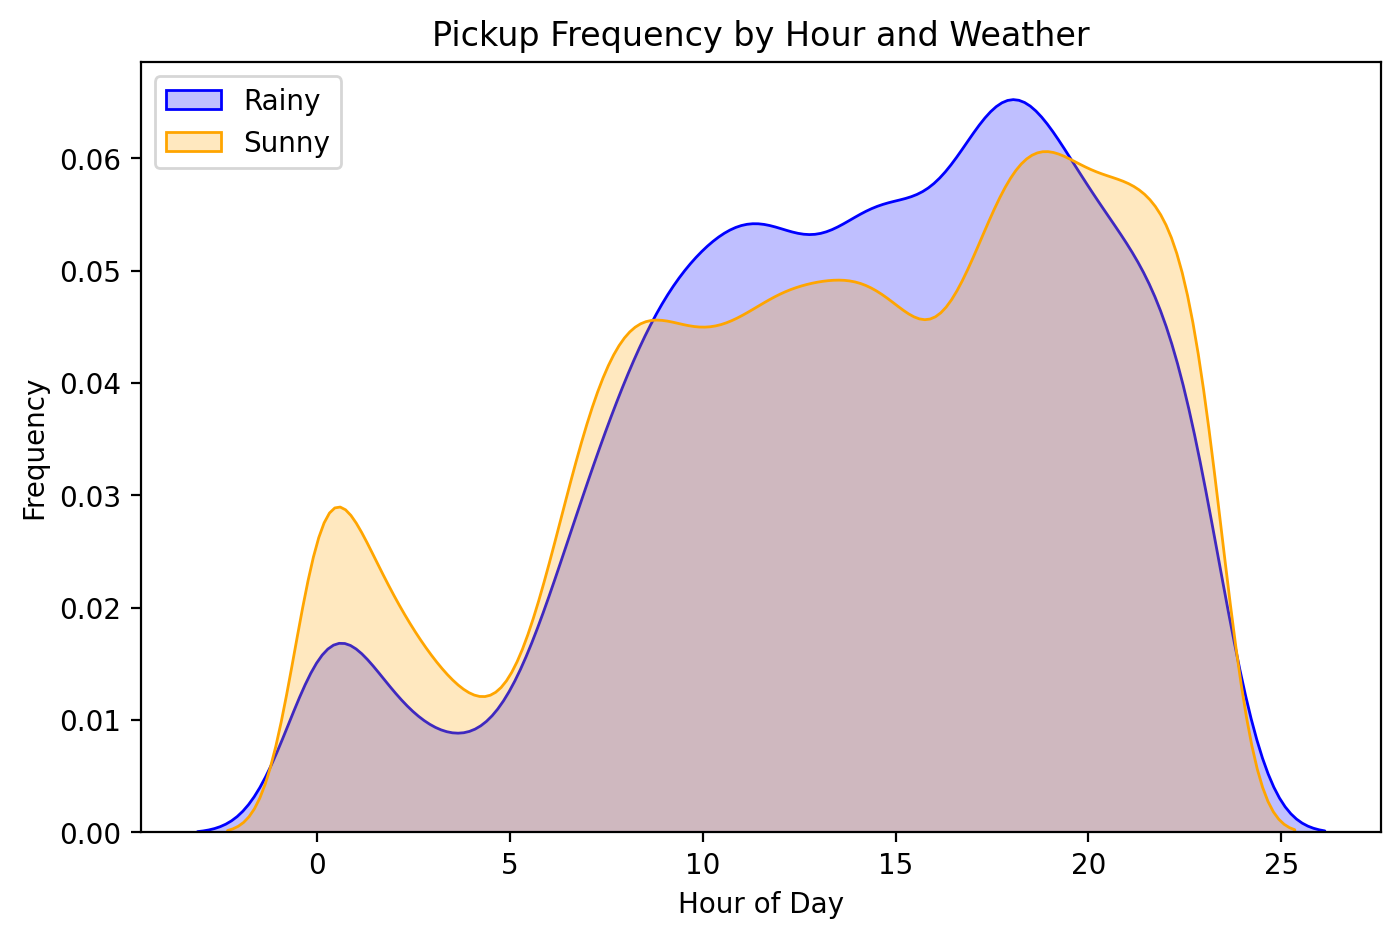

In [23]:
plt.figure(figsize=(8, 5), dpi=200)
sbn.kdeplot(precip, shade=True, label='Rainy', color='blue', bw_adjust=2)
sbn.kdeplot(sunny, shade=True, label='Sunny', color='orange', bw_adjust=2)
plt.title('Pickup Frequency by Hour and Weather')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

# Light GBM

In [ ]:
X1 = X.drop(columns=['id', 'vendor_id', 'pickup_datetime'])

# Get test train split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create param grid
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [30, 40],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5],
}

# LightGBM
lgb_train = lgb.LGBMRegressor()

# Grid search
grid_search = GridSearchCV(estimator=lgb_train, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

In [ ]:
# Best params
review = {'Best parameters from grid search': grid_search.best_params_, 'Best MSE': -grid_search.best_score_}
print('Best parameters from grid search:', grid_search.best_params_)
print('Best MSE:': -grid_search.best_score_)

print("\n\n", review)